In [3]:
import pandas as pd
df0 = pd.read_parquet(r'C:\Users\emma\projects\gitstats\df0.parquet')
df1 = pd.read_parquet(r'C:\Users\emma\projects\gitstats\df1.parquet')
df2 = pd.read_parquet(r'C:\Users\emma\projects\gitstats\df2.parquet')

import csv
import zipfile
import pandas as pd

with zipfile.ZipFile('C:/Users/emma/Downloads/Clockify_Time_Report_Detailed_01_01_2022-31_12_2022-2.csv.zip', 'r') as zip_ref:
  zip_ref.extract('Clockify_Time_Report_Detailed_01_01_2022-31_12_2022-2.csv', 'C:/temp')

df_clock = pd.read_csv('C:/temp/Clockify_Time_Report_Detailed_01_01_2022-31_12_2022-2.csv', error_bad_lines=False)



C:\Users\emma\AppData\Local\Temp\ipykernel_11388\3254759890.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_clock = pd.read_csv('C:/temp/Clockify_Time_Report_Detailed_01_01_2022-31_12_2022-2.csv', error_bad_lines=False)
b'Skipping line 7143: expected 17 fields, saw 19\nSkipping line 7181: expected 17 fields, saw 19\nSkipping line 7210: expected 17 fields, saw 19\n'


In [4]:
df0.head(2)

,.py,.html,.svg,.js,.rst,.css,.png,.less,.mo,.po,...,.dvc,.jmx,.planner,.tex,.aux,.tfevents,.disabled,.dot,.private,.public
Andra Popescu,1807.0,36.0,6.0,4837.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Becky Lewis,33566.0,7592.0,NaN,3730.0,413.0,762.0,0.0,11.0,0.0,5062.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.head(2)

,.py,.html,.svg,.js,.rst,.css,.png,.less,.mo,.po,...,.dvc,.jmx,.planner,.tex,.aux,.tfevents,.disabled,.dot,.private,.public
Andra Popescu,1807.0,36.0,6.0,4837.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Becky Lewis,33566.0,7592.0,NaN,3730.0,413.0,762.0,0.0,11.0,0.0,5062.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.head(2)

,time,user,fsuf,dentropy_FlightDataConverter,dentropy_FlightDataConfiguration,dentropy_df2,dentropy_FlightDataProfiles,dentropy_FlightDataUtilities,dentropy_FlightDataExporter,dentropy_RNNAnomalyDetection,...,dentropy_DevelopmentTeam,dentropy_PolarisDataViewer,dentropy_FlightDataAnalyzer,dentropy_FlightDataStatistics,dentropy_FlightDataAccessor,dentropy_Spikes,dentropy_PolarisWebsite,dentropy_FlightDataAnalytics,dentropy_DataScienceLibrary,dentropy_PolarisDeployment
0,2017-10-31 17:22:50+00:00,Bruce James,.py,28.4962,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-17 15:44:20+00:00,Bruce James,.py,192.5083,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_clock.head(2)

,Project,Client,Description,Task,User,Group,Email,Tags,Billable,Start Date,Start Time,End Date,End Time,Duration (h),Duration (decimal),Billable Rate (GBP),Billable Amount (GBP)
0,Retire streaming branch,Lufthansa Technik,Blackify and lint FlightDataProcessing,NaN,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,NaN,No,31/12/2022,7:06,31/12/2022,9:37,2:31,2.52,0.0,0.0
1,Retire streaming branch,Lufthansa Technik,Plan testing strategy,NaN,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,NaN,No,31/12/2022,5:45,31/12/2022,7:05,1:20,1.33,0.0,0.0


In [11]:
common_users = list(set(df1['user']) & set(df_clock['User']))

In [322]:
common_users

['Zak Malikov',
 'Marek Petlicki',
 'Matthew Kaye',
 'Richard Hoy',
 'Atul Singh',
 'George Karalis',
 'Matt Pang',
 'Ian Readman',
 'Daniel Gillet',
 'Steve Voisey',
 'Dave Jesse']

In [617]:
df1['month']= df1['time'].dt.month
df1['month name'] = df1['time'].apply(lambda x: x.strftime('%B'))
df1 = df1.rename(columns=lambda x: x.replace('nlines_', ''))



In [619]:
df_clock['Start Date'] = pd.to_datetime(df_clock['Start Date'])
from datetime import datetime
df_clock['month'] = df_clock['Start Date'].dt.month
df_clock['month name'] = df_clock['Start Date'].apply(lambda x: x.strftime('%B'))


In [29]:
for index, row in df_clock.iterrows():
  if row['User'] == 'Ben':
    if row['month']< 3:
      df_clock.at[index, 'Group'] = 'Software Development'
    elif row['month'] >= 3:
      df_clock.at[index, 'Group'] = 'Data Science'


In [517]:
common_users_3 = list(set(df1_filtered['user']) & set(df_clock['user']))


In [632]:
df1_filtered =df1[(df1['time'].dt.year==2022)] #filter by common users (2)
df1_filtered.drop('df1', axis=1, inplace=True)
df1_filtered_2 = df1_filtered[df1_filtered['user'].isin(common_users_3)]
df1_filtmelt = df1_filtered_2.drop(columns=(['time', 'fsuf'])).melt(id_vars=['month','month name', 'user'], var_name='repo', value_name='lines')


C:\Users\emma\AppData\Local\Temp\ipykernel_11388\678012427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered.drop('df1', axis=1, inplace=True)


In [622]:
df1_filtmelt_v2 =df1_filtered_2.drop(columns = ['fsuf', 'month', 'month name']).melt(id_vars=['time', 'user'], var_name ='repo', value_name='lines')

daily_no_repos_by_user =pd.DataFrame(df1_filtmelt_v2.groupby(['user', df1_filtmelt_v2['time'].dt.date])['repo'].nunique())

In [633]:
df1_filtmelt = pd.DataFrame(df1_filtmelt.groupby([ 'user', 'month', 'month name', 'repo'])['lines'].sum())
df1_filtmelt= df1_filtmelt[df1_filtmelt['lines']!=0]
df1_filtmelt


lines
user          month month name repo                           
Atul Singh    7     July       PolarisDeployment           4.0
Daniel Gillet 1     January    FlightDataAnalyzer         75.0
                               FlightDataConfiguration  8757.0
                               FlightDataUtilities       242.0
                               PolarisDataViewer          36.0
...                                                        ...
Zak Malikov   4     April      PolarisDeployment         130.0
              5     May        PolarisDeployment          47.0
              6     June       PolarisDeployment          29.0
              7     July       PolarisDeployment          36.0
              8     August     PolarisDeployment           9.0

[139 rows x 1 columns]

In [219]:
%store -r df 
new_df_clock= df

In [220]:
new_df_clock

,Project,Client,Description,Task,User,Group,Email,Tags,Billable,Start Date,...,Duration (h),Duration (decimal),Billable Rate (GBP),Billable Amount (GBP),Category,Subcategory,month,month number,Productive,user type
0,Retire streaming branch,Lufthansa Technik,Blackify and lint FlightDataProcessing,NaN,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,NaN,No,2022-12-31,...,2:31,2.52,0.0,0.0,fdc,fdc,December,12,True,non- management
1,Retire streaming branch,Lufthansa Technik,Plan testing strategy,NaN,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,NaN,No,2022-12-31,...,1:20,1.33,0.0,0.0,fdc,fdc,December,12,True,non- management
2,Flight Data Connect,FDC Customers,FDP-1787,NaN,Mansi Pandit-Trivedi,Software Development,mansi.pandit-trivedi@flightdataservices.com,NaN,No,2022-12-30,...,0:47,0.78,0.0,0.0,fdc,fdc,December,12,True,non- management
3,NaN,NaN,NaN,NaN,Ben,Data Science,brainfuel@icloud.com,NaN,No,2022-12-30,...,1:00,1.00,0.0,0.0,other,other other,December,12,True,non- management
4,App: Pilot App,Analytics Applications,Get app working,NaN,Ben,Data Science,brainfuel@icloud.com,NaN,No,2022-12-30,...,0:01,0.02,0.0,0.0,data_science,data_science,December,12,True,non- management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27647,Analysis Engine,FDC Customers,[AE-3273]: APK B777 segments not processing,AE-3273,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,Support,No,2022-03-01,...,1:07,1.12,0.0,0.0,fdc,fdc,March,3,True,non- management
27648,Analysis Engine,FDC Customers,[AE-3218]: Radio Altitude overflows causing Al...,AE-3218,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,Bug,No,2022-03-01,...,0:16,0.27,0.0,0.0,fdc,fdc,March,3,True,non- management
27649,Admin (Internal),Internal,emails,NaN,Daniel Gillet,Software Development,daniel.gillet@l3harris.com,NaN,No,2022-03-01,...,0:09,0.15,0.0,0.0,overheads,admin,March,3,False,non- management
27650,Holiday,Internal,Bank Holiday,NaN,Matthew Coxall,NaN,matthew.coxall@l3harris.com,NaN,No,2022-03-01,...,8:00,8.00,0.0,0.0,time_off,holiday,March,3,False,management


In [221]:

new_df_clock.rename(columns = {'User':'user'}, inplace = True)
new_df_clock.rename(columns = {'month':'month name'}, inplace = True)
new_df_clock.rename(columns = {'month number':'month'}, inplace = True)

In [528]:
new_df_clock_filtered =new_df_clock_v2[['user',  'Group','Category','month','month name', 'Duration (decimal)'] ]
new_df_clock_v2 = new_df_clock[(new_df_clock['user'].isin(common_users_3))&(new_df_clock['month']<=8)]

In [527]:
v2_new_df_clock_filtered =new_df_clock_v2[['user', 'Productive','month','month name', 'Duration (decimal)'] ]

In [286]:
new_df_clock_filtered_gb_prod = pd.DataFrame(v2_new_df_clock_filtered.groupby(['user', 'month', 'month name', 'Productive'])['Duration (decimal)'].sum().reset_index(level=3))
new_df_clock_filtered_gb_prod

Productive  Duration (decimal)
user        month month name                                
Atul Singh  1     January          False                9.00
                  January           True               43.00
            2     February          True               36.00
            3     March             True               27.00
            4     April            False                9.00
...                                  ...                 ...
Zak Malikov 3     March             True                2.62
            4     April             True                4.80
            6     June              True                0.93
            7     July              True                5.83
            8     August            True               21.41

[119 rows x 2 columns]

In [293]:
new_df_clock_filtered_gb = pd.DataFrame(new_df_clock_filtered.groupby(['user', 'month', 'month name', 'Category'])['Duration (decimal)'].sum())
new_df_clock_filtered_gb

Duration (decimal)
user        month month name Category                    
Atul Singh  1     January    fdc                    43.00
                             time_off                9.00
            2     February   fdc                    36.00
            3     March      fdc                    27.00
            4     April      fdc                    26.00
...                                                   ...
Zak Malikov 4     April      adapt                   4.80
            6     June       other                   0.93
            7     July       fdc                     3.60
                             other                   2.23
            8     August     other                  21.41

[217 rows x 1 columns]

In [624]:
concatenated = pd.concat([df1_filtmelt, new_df_clock_filtered_gb], axis=1)
# concatenated = concatenated.unstack(level=-1)
# concatenated[concatenated.index.get_level_values(level=0)=='Atul Singh']
concatenated

lines  \
user          month month name                                   
Atul Singh    7     July       PolarisDeployment           4.0   
Daniel Gillet 1     January    FlightDataAnalyzer         75.0   
                               FlightDataConfiguration  8757.0   
                               FlightDataUtilities       242.0   
                               PolarisDataViewer          36.0   
...                                                        ...   
Zak Malikov   4     April      adapt                       NaN   
              6     June       other                       NaN   
              7     July       fdc                         NaN   
                               other                       NaN   
              8     August     other                       NaN   

                                                        Duration (decimal)  
user          month month name                                              
Atul Singh    7     July       PolarisDeployment                       NaN  
Daniel Gillet 1     January    FlightDataAnalyzer                      NaN  
                               FlightDataConfiguration                 NaN  
                               FlightDataUtilities                     NaN  
                               PolarisDataViewer                       NaN  
...                                                                    ...  
Zak Malikov   4     April      adapt                                  4.80  
              6     June       other                                  0.93  
              7     July       fdc                                    3.60  
                               other                                  2.23  
              8     August     other                                 21.41  

[356 rows x 2 columns]

In [350]:
concatenated.to_parquet('concatenated.parquet')

In [347]:
df1_filtmelt.to_parquet('df1_gb_user.parquet')

In [272]:
new_df_clock_filtered_gb.to_parquet('clockify_gb_user.parquet')

In [275]:
new_df_clock_filtered_gb_prod.to_parquet('clockify_gb_user_prod.parquet')


In [476]:
new_df_clock_v2['week_commencing'] = new_df_clock_v2['Start Date'].dt.to_period('W').dt.start_time
weekly_no_projs_by_user = pd.DataFrame(new_df_clock_v2.groupby(['user', 'week_commencing'])['Project'].nunique().reset_index())

C:\Users\emma\AppData\Local\Temp\ipykernel_11388\4232996334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_clock_v2['week_commencing'] = new_df_clock_v2['Start Date'].dt.to_period('W').dt.start_time


In [625]:
df1_filtmelt_v2['week_commencing'] = df1_filtmelt_v2['time'].dt.to_period('W').dt.start_time
weekly_no_lines_by_user = pd.DataFrame(df1_filtmelt_v2.groupby(['user', 'week_commencing'])['lines'].sum().reset_index())
weekly_no_lines_by_user


c:\Users\emma\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,user,week_commencing,lines
0,Atul Singh,2022-07-11,4.0
1,Daniel Gillet,2022-01-03,9060.0
2,Daniel Gillet,2022-01-10,242.0
3,Daniel Gillet,2022-01-17,485.0
4,Daniel Gillet,2022-01-24,256.0
...,...,...,...
119,Zak Malikov,2022-06-27,22.0
120,Zak Malikov,2022-07-04,1.0
121,Zak Malikov,2022-07-11,11.0
122,Zak Malikov,2022-07-18,24.0


In [493]:
weekly_lines_projs = pd.merge(weekly_no_lines_by_user, weekly_no_projs_by_user, on=['user', 'week_commencing'], how='outer')
weekly_lines_projs = weekly_lines_projs.drop((weekly_lines_projs[(weekly_lines_projs['lines'].isna())&(weekly_lines_projs['Project']==0)]).index)
weekly_lines_projs


,user,week_commencing,lines,Project
0,Atul Singh,2022-07-11,4.0,1.0
1,Daniel Gillet,2022-01-03,9060.0,9.0
2,Daniel Gillet,2022-01-10,242.0,10.0
3,Daniel Gillet,2022-01-17,485.0,10.0
4,Daniel Gillet,2022-01-24,256.0,9.0
...,...,...,...,...
264,Steve Voisey,2022-07-25,NaN,4.0
265,Steve Voisey,2022-08-01,NaN,5.0
266,Steve Voisey,2022-08-08,NaN,2.0
267,Steve Voisey,2022-08-22,NaN,3.0


In [474]:
daily_no_projs_by_user =pd.DataFrame(new_df_clock_v2.groupby(['user', 'Start Date'])['Project'].nunique().reset_index())
daily_no_projs_by_user.rename(columns={'Start Date': 'time'}, inplace=True)

In [529]:
daily_projs_by_user_3ormore = daily_no_projs_by_user[daily_no_projs_by_user['Project'] >2]

In [626]:
daily_lines_by_user =pd.DataFrame(df1_filtmelt_v2.groupby(['user', df1_filtmelt_v2['time'].dt.date])['lines'].sum().reset_index())
daily_lines_by_user['time']= pd.to_datetime(daily_lines_by_user['time'])

In [627]:
daily_lines_projs = pd.merge(daily_lines_by_user, daily_no_projs_by_user, on=['user', 'time'], how='outer')
daily_lines_projs =daily_lines_projs.drop((daily_lines_projs[(daily_lines_projs['lines'].isna())&(daily_lines_projs['Project']==0)]).index)
daily_lines_projs

,user,time,lines,Project
0,Atul Singh,2022-07-11,4.0,1.0
1,Daniel Gillet,2022-01-03,8781.0,4.0
2,Daniel Gillet,2022-01-04,200.0,NaN
3,Daniel Gillet,2022-01-05,67.0,NaN
4,Daniel Gillet,2022-01-06,10.0,1.0
...,...,...,...,...
1077,Steve Voisey,2022-08-26,NaN,2.0
1078,Steve Voisey,2022-08-29,NaN,1.0
1079,Steve Voisey,2022-08-30,NaN,2.0
1080,Steve Voisey,2022-08-31,NaN,2.0


In [628]:
weekly_lines_projs.rename(columns={'Project': 'no_projects', 'lines' : 'no_lines_changed'}, inplace=True)
weekly_lines_projs

,user,week_commencing,no_lines_changed,no_projects
0,Atul Singh,2022-07-11,4.0,1.0
1,Daniel Gillet,2022-01-03,9060.0,9.0
2,Daniel Gillet,2022-01-10,242.0,10.0
3,Daniel Gillet,2022-01-17,485.0,10.0
4,Daniel Gillet,2022-01-24,256.0,9.0
...,...,...,...,...
264,Steve Voisey,2022-07-25,NaN,4.0
265,Steve Voisey,2022-08-01,NaN,5.0
266,Steve Voisey,2022-08-08,NaN,2.0
267,Steve Voisey,2022-08-22,NaN,3.0


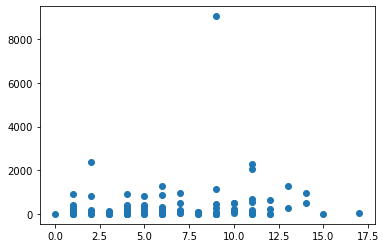

In [629]:
import matplotlib.pyplot as plt
plt.scatter(weekly_lines_projs['no_projects'], weekly_lines_projs['no_lines_changed'])

In [630]:
def calc_avg_weekly_projects(person):
    avg_weekly_projects =weekly_lines_projs[weekly_lines_projs['user']==person]['no_projects'].mean()
    return avg_weekly_projects

def calc_avg_weekly_lines(person):
    avg_weekly_lines =weekly_lines_projs[weekly_lines_projs['user']==person]['no_lines_changed'].mean()
    return avg_weekly_lines

In [539]:
users = list(weekly_lines_projs['user'].unique())

In [541]:
my_data = {'user': [], 'mean weekly projects': [], 'mean weekly lines changed': []}

for user in users:
    my_data['user'].append(user)
    my_data['mean weekly projects'].append(calc_avg_weekly_projects(user))
    my_data['mean weekly lines changed'].append(calc_avg_weekly_lines(user))
    
mean_weekly_lines_projs_by_user = pd.DataFrame(my_data)

In [542]:
mean_weekly_lines_projs_by_user

,user,mean weekly projects,mean weekly lines changed
0,Atul Singh,1.173913,4.000000
1,Daniel Gillet,7.361111,744.961538
2,Dave Jesse,1.172414,495.400000
3,George Karalis,6.111111,200.500000
4,Ian Readman,3.130435,50.750000
5,Marek Petlicki,10.057143,264.739130
6,Richard Hoy,3.861111,232.800000
7,Steve Voisey,3.138889,136.117647
8,Zak Malikov,0.666667,24.846154


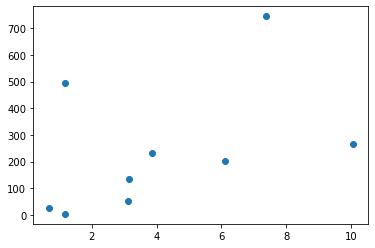

In [545]:
plt.scatter(mean_weekly_lines_projs_by_user['mean weekly projects'], mean_weekly_lines_projs_by_user['mean weekly lines changed'])

In [580]:
time_off =new_df_clock_v2[new_df_clock_v2['Category']=='time_off'][['user', 'Start Date', 'Project']]
time_off.rename(columns ={'Start Date' : 'date'}, inplace=True)
time_off

,user,date,Project
1496,Marek Petlicki,2022-07-12,Holiday
1702,Marek Petlicki,2022-05-12,Holiday
1716,Atul Singh,2022-05-12,Holiday
1814,Richard Hoy,2022-02-12,Holiday
1908,Richard Hoy,2022-01-12,Illness
...,...,...,...
25224,Daniel Gillet,2022-03-02,Holiday
25332,Daniel Gillet,2022-02-02,Holiday
25448,Daniel Gillet,2022-01-02,Holiday
25546,George Karalis,2022-01-31,Holiday


In [581]:
daily_lines_by_user.rename(columns={'time': 'date'}, inplace=True)


In [584]:
lines_changed_during_time_off =pd.merge(time_off, daily_lines_by_user, on = ['user', 'date'], how='left')
lines_changed_during_time_off[~lines_changed_during_time_off['lines'].isna()]

,user,date,Project,lines
0,Marek Petlicki,2022-07-12,Holiday,35.0
1,Marek Petlicki,2022-05-12,Holiday,20.0
8,George Karalis,2022-08-09,Holiday,46.0
13,Richard Hoy,2022-02-09,Holiday,34.0
26,Steve Voisey,2022-02-08,Illness,2.0
49,George Karalis,2022-05-23,Holiday,218.0
51,Steve Voisey,2022-05-05,Holiday,827.0
80,Daniel Gillet,2022-03-02,Holiday,490.0


In [586]:
new_df_clock_v2[new_df_clock_v2['user']=='Daniel Gillet']['Project'].unique()

array(['FDX', 'Retire streaming branch', 'Flight Data Connect',
       'Flight Data API', 'Meetings', 'Admin (Internal)', 'Stats',
       'CVR pipeline', 'Data Transfer Unit', 'Express Readout',
       'Onboarding', 'Data Exports', 'SMS Integration', 'Data Pipeline',
       'SmartNode', 'FDC Backend', 'Analysis Engine [TD]',
       'FDC Data Transfer', 'Flight Data Statistics', 'Release', nan,
       'Infrastructure', 'Analysis Engine [LHT]', 'Analysis Engine',
       'Training (Other)', 'EXR Datalink', 'Software Development CAS',
       'CAS Software Development - OLD', 'ADAPT Analysis',
       'Technical Debt', 'CI/CD', 'ADAPT', 'Fleet Configuration',
       'Lufthansa Technik', 'Holiday', 'FDX Stats Website'], dtype=object)

In [596]:
start_dates = pd.DataFrame(new_df_clock_v2.groupby(['user', 'Project'])['Start Date'].min().reset_index(level=1))
start_dates

,Project,Start Date
user,,
Atul Singh,Bank Holiday,2022-01-11
Atul Singh,FDX,2022-01-06
Atul Singh,FDX Exports,2022-08-29
Atul Singh,Holiday,2022-05-12
Daniel Gillet,ADAPT,2022-01-14
...,...,...
Steve Voisey,Scrum,2022-04-14
Steve Voisey,Software Development CAS,2022-04-04
Steve Voisey,Training (Corporate),2022-01-21


In [597]:
end_dates = pd.DataFrame(new_df_clock_v2.groupby(['user', 'Project'])['Start Date'].max().reset_index(level=1))
end_dates.rename(columns = {'Start Date': 'End Date'}, inplace =True)
end_dates

,Project,End Date
user,,
Atul Singh,Bank Holiday,2022-05-10
Atul Singh,FDX,2022-08-30
Atul Singh,FDX Exports,2022-08-29
Atul Singh,Holiday,2022-05-12
Daniel Gillet,ADAPT,2022-06-01
...,...,...
Steve Voisey,Scrum,2022-08-23
Steve Voisey,Software Development CAS,2022-06-04
Steve Voisey,Training (Corporate),2022-01-21


In [599]:
start_end_dates = pd.merge(start_dates, end_dates, on = ['user', 'Project'])
start_end_dates

,Project,Start Date,End Date
user,,,
Atul Singh,Bank Holiday,2022-01-11,2022-05-10
Atul Singh,FDX,2022-01-06,2022-08-30
Atul Singh,FDX Exports,2022-08-29,2022-08-29
Atul Singh,Holiday,2022-05-12,2022-05-12
Daniel Gillet,ADAPT,2022-01-14,2022-06-01
...,...,...,...
Steve Voisey,Scrum,2022-04-14,2022-08-23
Steve Voisey,Software Development CAS,2022-04-04,2022-06-04
Steve Voisey,Training (Corporate),2022-01-21,2022-01-21


In [612]:
start_end_dates[~start_end_dates['Project'].isin(['Holiday', 'Bank Holiday', 'NaN', 'Admin (Internal)', 'Scrum', 'Training (Corporate)', 'Onboarding', 'Meetings', 'Illness'])]

,Project,Start Date,End Date
user,,,
Atul Singh,FDX,2022-01-06,2022-08-30
Atul Singh,FDX Exports,2022-08-29,2022-08-29
Daniel Gillet,ADAPT,2022-01-14,2022-06-01
Daniel Gillet,ADAPT Analysis,2022-03-16,2022-03-16
Daniel Gillet,Analysis Engine,2022-01-03,2022-08-02
...,...,...,...
Steve Voisey,FDC Backend,2022-01-07,2022-08-31
Steve Voisey,SMS Integration,2022-04-01,2022-04-01
Steve Voisey,Software Development CAS,2022-04-04,2022-06-04


In [613]:
start_end_dates[~start_end_dates['Project'].isin(['Holiday', 'Bank Holiday', 'NaN', 'Admin (Internal)', 'Scrum', 'Training (Corporate)', 'Onboarding', 'Meetings', 'Illness'])]['Project'].value_counts()

FDC Backend                 6
FDX                         5
Flight Data Connect         5
Express Readout             4
Software Development CAS    4
                           ..
Airport Database            1
FDX Exports                 1
Stats                       1
ADAPT Analysis              1
Bill IATA HOURS             1
Name: Project, Length: 62, dtype: int64

In [636]:
df1.columns

Index(['time', 'user', 'fsuf', 'Spikes', 'DataScienceLibrary',
       'FlightDataProfiles', 'FlightDataConverter', 'FlightDataStatistics',
       'DevelopmentTeam', 'FlightDataAccessor', 'FlightDataConfiguration',
       'df1', 'PolarisDeployment', 'FlightDataAnalyzer', 'PolarisDataViewer',
       'FlightDataExporter', 'PolarisWebsite', 'RNNAnomalyDetection',
       'FlightDataAnalytics', 'AutoEventValidation', 'FlightDataUtilities',
       'month', 'month name'],
      dtype='object')